# Analyzing Fandango's movie ratings

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis [in this article](https://fivethirtyeight.com/features/fandango-movies-ratings/).

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
previous = pd.read_csv('fandango_score_comparison.csv')
new = pd.read_csv('movie_ratings_16_17.csv')

In [4]:
previous

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,2.50,3.40,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,2.65,3.80,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,4.05,3.40,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,4.05,4.40,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,4.00,4.25,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


In [5]:
new

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
5,A Monster Calls,2016,76,7.5,87,84,4.0,3.80,3.75,4.35,4.20,4.0,4.0,4.5,4.0
6,A Street Cat Named Bob,2016,54,7.4,77,79,4.5,2.70,3.70,3.85,3.95,2.5,3.5,4.0,4.0
7,Alice Through the Looking Glass,2016,34,6.2,30,50,4.0,1.70,3.10,1.50,2.50,1.5,3.0,1.5,2.5
8,Allied,2016,60,7.1,61,66,4.0,3.00,3.55,3.05,3.30,3.0,3.5,3.0,3.5
9,Amateur Night,2016,38,5.0,0,27,3.5,1.90,2.50,0.00,1.35,2.0,2.5,0.0,1.5


In [6]:
previous = previous[['FILM','Fandango_Stars','Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']]
new = new[['movie','year','fandango']]

In [7]:
previous

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
5,The Water Diviner (2015),4.5,4.0,397,0.5
6,Irrational Man (2015),4.0,3.5,252,0.5
7,Top Five (2014),4.0,3.5,3223,0.5
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5
9,Love & Mercy (2015),4.5,4.0,864,0.5


In [8]:
new

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
6,A Street Cat Named Bob,2016,4.5
7,Alice Through the Looking Glass,2016,4.0
8,Allied,2016,4.0
9,Amateur Night,2016,3.5


We will not be able to exactly determine if there's been a change from the previous rating system to the new one. A proxy for this can be to compare ratings from 2015 (in the previous rating system) and the ratings from 2016 (in the new rating system)

In [9]:
previous['year'] = previous['FILM'].str[-5:-1].astype(int)

C:\Users\jfpsm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
previous = previous[previous['year'] == 2015]

In [11]:
previous

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015
5,The Water Diviner (2015),4.5,4.0,397,0.5,2015
6,Irrational Man (2015),4.0,3.5,252,0.5,2015
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5,2015
9,Love & Mercy (2015),4.5,4.0,864,0.5,2015
10,Far From The Madding Crowd (2015),4.5,4.0,804,0.5,2015


In [12]:
new = new[new['year'] == 2016]

In [13]:
new

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
6,A Street Cat Named Bob,2016,4.5
7,Alice Through the Looking Glass,2016,4.0
8,Allied,2016,4.0
9,Amateur Night,2016,3.5
10,Anthropoid,2016,4.0


Text(0.5,1,"Comparing Fandango's ratings (2015 vs 2016)")

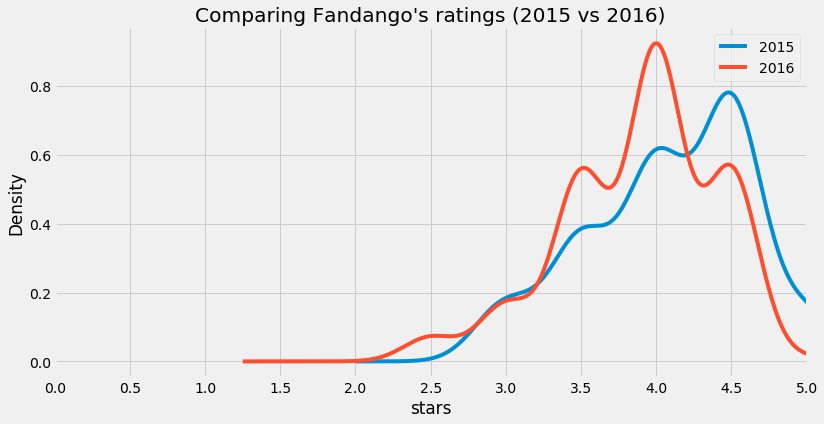

In [20]:
plt.style.use('fivethirtyeight')
previous['Fandango_Stars'].plot.kde(label='2015',legend=True,figsize=(12,6))
new['fandango'].plot.kde(label='2016',legend=True)
plt.xlabel('stars')
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.title('Comparing Fandango\'s ratings (2015 vs 2016)')


From the plot above we can see movies from 2016 were rated lower than movies from 2015.

We will move on onto analyzing frequency tables.

In [23]:
previous['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [24]:
new['fandango'].value_counts(normalize=True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

We can see the appearance of filmes rated 2.5, and the diminishing percentage of filmes rated 5.0, indicating a negative direction on movie ratings. Let's look onto other metrics:

In [61]:
indexes = ['mean','median','mode']
cols = [2015,2016]

metrics = pd.DataFrame(index=indexes,columns=cols)

metrics.loc['mean',2015] = previous['Fandango_Stars'].mean()
metrics.loc['median',2015] = previous['Fandango_Stars'].median()
metrics.loc['mode',2015] = previous['Fandango_Stars'].mode()[0]

metrics.loc['mean',2016] = new['fandango'].mean()
metrics.loc['median',2016] = new['fandango'].median()
metrics.loc['mode',2016] = new['fandango'].mode()[0]

In [62]:
metrics

,2015,2016
mean,4.08527,3.88743
median,4,4
mode,4.5,4


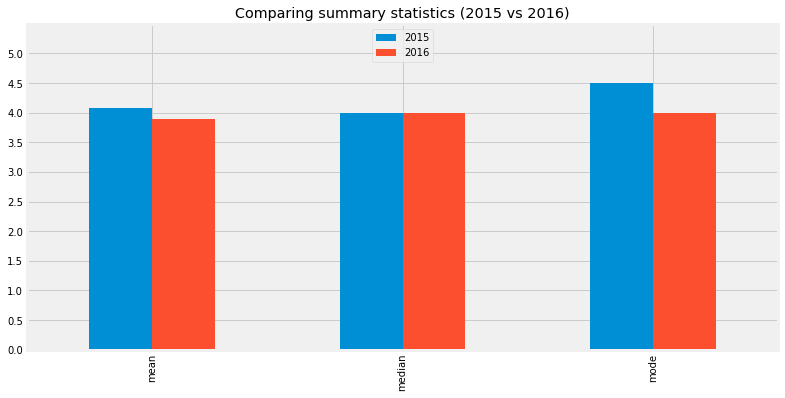

In [96]:
metrics.plot.bar(figsize=(12,6))
plt.ylim(0,5.5)
plt.title('Comparing summary statistics (2015 vs 2016)')
plt.yticks([x/2 for x in range(0,11)])
plt.legend(loc=9)